### 필수과제3
- 과거 주가 데이터를 가지고 시계열 데이터 분석을 해주시는데, 트렌드를 보고 갑자기 상승하거나, 하락하는 경우가 있을 것
- 단순한 재무적 정보가 아니라 비재무적인 정보들도 서칭하셔서 왜 그런식의 트렌드가 반영되었는지 같이 확인하면 좋을 것
- dart 재무적정보 확인 가능, 네이버 금융기사 리서치해도 충분히 다 나온다.

In [18]:
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

In [3]:
!pip install finance-datareader
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
fdr.StockListing('KRX').head(30)
# 셀트리온 068270

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72200,2,-200,-0.28,72500,72700,71700,11694765,844353820176,431018300110000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,553000,1,3000,0.55,551000,556000,548000,173743,95782869000,129402000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,115200,2,-1000,-0.86,114600,115500,113200,2674318,307081354902,83865872448000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,744000,2,-4000,-0.53,748000,753000,741000,45085,33625021000,52953456000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,59500,2,-1000,-1.65,60400,60400,59500,1514957,90428632500,48961758650000,822886700,STK
5,051910,KR7051910008,LG화학,KOSPI,,667000,1,7000,1.06,665000,673000,660000,176510,117588344000,47085092781000,70592343,STK
6,006400,KR7006400006,삼성SDI,KOSPI,,669000,1,4000,0.60,666000,676000,653000,253831,168385799727,46003470570000,68764530,STK
7,005380,KR7005380001,현대차,KOSPI,,206500,1,2000,0.98,204500,209000,204500,563079,116632794500,43681255989000,211531506,STK
8,000270,KR7000270009,기아,KOSPI,,88500,1,2500,2.91,86800,88600,86700,1899152,167364079900,35580911965500,402044203,STK
9,005490,KR7005490008,POSCO홀딩스,KOSPI,,388000,1,500,0.13,390500,390500,384000,520732,201663329000,32813637240000,84571230,STK


In [4]:
df= fdr.DataReader('068270','2018-01-01','2022-02-25')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,206047,209825,204757,208167,0,0.021709
2018-01-03,210930,227794,209272,227334,0,0.092075
2018-01-04,230007,240696,226044,230376,0,0.013381
2018-01-05,234890,246041,234061,245949,0,0.067598
2018-01-08,256637,279399,255440,278754,0,0.133381
...,...,...,...,...,...,...
2022-02-21,150271,156532,149307,155569,436457,0.025396
2022-02-22,152679,157977,152197,157014,521839,0.009288
2022-02-23,157014,159422,154124,154606,433009,-0.015336


In [5]:
df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-21', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25'],
              dtype='datetime64[ns]', name='Date', length=1023, freq=None)

In [14]:
df.index.names = ['ds']
df_f = df[['Close']]
df_f

,Close
ds,
2018-01-02,208167
2018-01-03,227334
2018-01-04,230376
2018-01-05,245949
2018-01-08,278754
...,...
2022-02-21,155569
2022-02-22,157014
2022-02-23,154606


<Axes: xlabel='ds'>

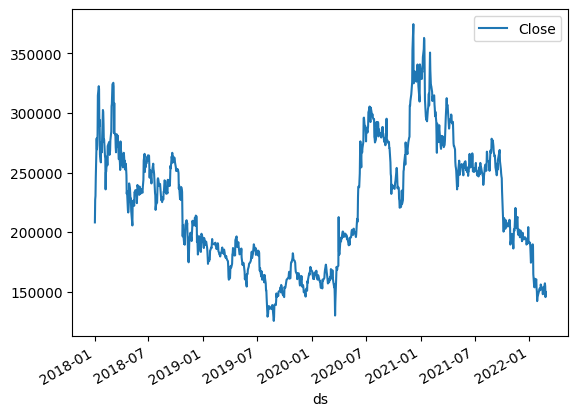

In [15]:
df_f.plot()

In [16]:
df_f.reset_index(inplace=True)#인덱스를 다시 풀어서 두 컬럼으로 만든다. prophet을 돌리기 위해
df_f

,ds,Close
0,2018-01-02,208167
1,2018-01-03,227334
2,2018-01-04,230376
3,2018-01-05,245949
4,2018-01-08,278754
...,...,...
1018,2022-02-21,155569
1019,2022-02-22,157014
1020,2022-02-23,154606
1021,2022-02-24,145455


In [22]:
# train, test로 나누기
# train데이터를 가지고 미래 30일을 예측하여 test 데이터와 비교해서 실제 값이 어떤지 확인한다.
df_f.rename(columns = {'Close':'y',},inplace=True)

train=df_f[:900]
test = df_f[900:] #시계열 데이터는 shuffle 하지 않는다.
print(train)

            ds       y
0   2018-01-02  208167
1   2018-01-03  227334
2   2018-01-04  230376
3   2018-01-05  245949
4   2018-01-08  278754
..         ...     ...
895 2021-08-19  256213
896 2021-08-20  251487
897 2021-08-23  268505
898 2021-08-24  267087
899 2021-08-25  266614

[900 rows x 2 columns]


In [23]:
prophet=Prophet(daily_seasonality=True,growth='linear')
prophet.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwakm6b04/1lj3g4yz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwakm6b04/afizg_de.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16779', 'data', 'file=/tmp/tmpwakm6b04/1lj3g4yz.json', 'init=/tmp/tmpwakm6b04/afizg_de.json', 'output', 'file=/tmp/tmpwakm6b04/prophet_modelwgapzs6w/prophet_model-20230702110800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:08:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:08:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
#뒤에 얼마나 예측해서 출력할 것인가?
future=prophet.make_future_dataframe(periods=40) #그 뒤에 얼마나 기간을 예측할 것인가 넣으면 된다. 30일이면 한달, 5면 5일 일개념의 시계열데이터라면
forecast = prophet.predict(future)

In [26]:
ph_yhat=forecast[['ds','yhat']][900:] #실제예측한 값
ph_yhat

,ds,yhat
900,2021-08-26,246896.946752
901,2021-08-27,247931.895633
902,2021-08-28,237879.038316
903,2021-08-29,237995.920501
904,2021-08-30,248089.522391
905,2021-08-31,247990.376902
906,2021-09-01,247214.865843
907,2021-09-02,247494.975463
908,2021-09-03,248371.914898
909,2021-09-04,238111.700474


          ds           yhat     yhat_lower     yhat_upper
0 2018-01-02  282895.640151  256090.539046  308764.140081
1 2018-01-03  281883.786652  259012.853842  307945.490612
2 2018-01-04  282013.274166  258263.546604  307461.897784
3 2018-01-05  282828.317724  259141.545650  307695.982731
4 2018-01-08  282578.770527  258339.100963  307412.965143


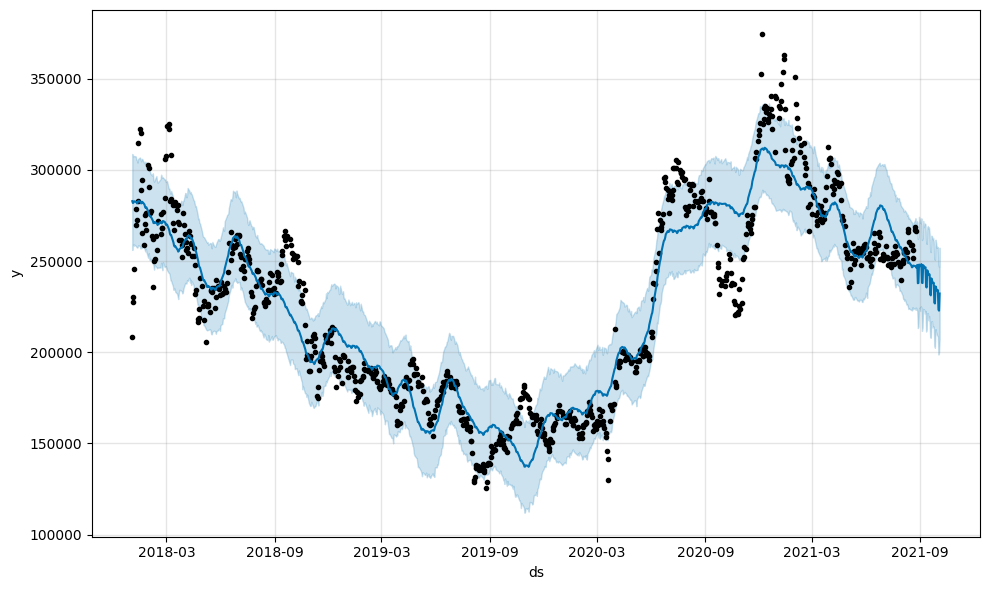

In [27]:
#forecast 시각화
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
#plot을 통한 시각화
prophet.plot(forecast)
plt.show()

## 셀트리온 2020년 3월 주가 상승
- http://www.press9.kr/news/articleView.html?idxno=44886
- 우선 그룹사의 연이은 호재에 편승하며 덕을 봤다. 상승폭이 컸던 지난 1일과 3일에 셀트리온이 '코로나19 항체 치료제 개발 동물시험 성공'과 '국산 1호 인슐린 펜형 주사제 개발' 소식을 연이어 발표하자 셀트리온제약 주가도 덩달아 전일 대비 23%과 8% 상승했다. 관련 소식이 셀트리온제약과는 직접적인 연관성은 없지만 셀트리온 품목의 국내 유통과 판매를 맡는 셀트리온제약의 향후 역할론에 대한 기대감이 주가에 반영됐을 거란 시각이다.

셀트리온제약의 실적개선도 주요했다. 셀트리온제약은 지난해 실적에 이어 올 1분기 호실적을 기록하며 뚜렷한 성장세를 이어가고 있다. 올 1분기 연결 기준 매출액과 영업이익이 전년대비 각각 15%와 140% 상승한 443억원, 43억원을 기록했다. 대표 제품인 간장용제 ‘고덱스’가 56% 성정해 최대실적인 179억원을 올리는 등 케미칼 제품을 중심으로 매출이 확대되고 있다. 매출은 ▲2015년 747억원 ▲2016년 1048억원▲2017년 1358억원 ▲2018년 1468억원 ▲2019년 1735억원으로 꾸준히 성장하고 있어 올해 2000억원 달성도 기대되는 상황이다.

출처 : PRESS9(http://www.press9.kr)

## 셀트리온 2021년 이어지는 주가 하락
http://www.insightkorea.co.kr/news/articleView.html?idxno=94372
=> 3사 합병 이후 시너지 효과 없다. 이어지는 주가하락